In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.tseries.offsets as offsets


def get_ohlc(df, interval):
    x = df.resample(interval).ohlc()
    ret = pd.DataFrame(
        {
            'Open': x['Open']['open'],
            'High': x['High']['high'],
            'Low': x['Low']['low'],
            'Close': x['Close']['close']
        },
         columns=['Open','High','Low','Close']
    ) 
    return ret.dropna()

def get_csv_path(name):
    base_path =  'rateData/new/'
    path = base_path + name + "/"+name+".csv"
    return path

def read_csv(name):
    file_path = get_csv_path(name)
    df = pd.read_csv(
        file_path, 
        names=('Time','Open','High','Low','Close', 'High(ASK)','Low(ASK)'),
        index_col='Time',
        parse_dates=['Time']
    )
    return df


# dataM1.index += offsets.Hour(0) 


In [37]:
data201504 = read_csv("201504")
data201505 = read_csv("201505")
data201506 = read_csv("201506")

In [39]:
data = pd.concat([data201504,data201505,data201506])
ohlcD1 = get_ohlc(data, 'D')
ohlcD1.head()

,Open,High,Low,Close
Time,,,,
2015-04-01,120.046,120.328,119.416,119.644
2015-04-02,119.644,119.893,119.449,119.751
2015-04-03,119.751,119.939,118.718,118.905
2015-04-04,118.906,119.042,118.870,118.979
2015-04-06,118.836,119.166,118.797,118.978


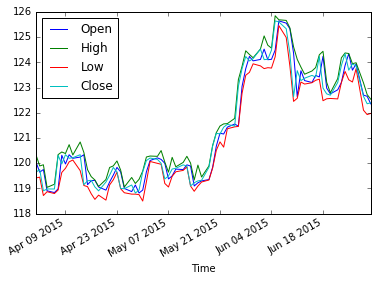

In [40]:
ohlcD1.plot()

(<matplotlib.collections.LineCollection at 0x7f76189de6d8>,
 <matplotlib.collections.PolyCollection at 0x7f76189de828>)

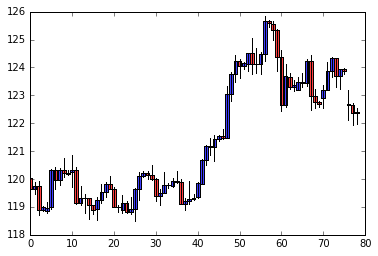

In [41]:
import matplotlib.finance as mpf
ohlc = ohlcD1
ax = plt.subplot()
mpf.candlestick2_ohlc(ax, ohlc['Open'], ohlc['High'], ohlc['Low'], ohlc['Close'],
                      width=0.9, colorup='blue', colordown='red')